## Draw Bounding Boxes on Images and Write Class Labels with the Roboflow Python SDK and Supervision
<p>
  <a align="center" href="" target="_blank">
    <img
      width="60%"
      src="https://raw.githubusercontent.com/roboflow/roboflow-computer-vision-utilities/main/figures/roboflow-cv-utilities-header.png"
    >
  </a>
</p>

## Installing Dependencies
Both the Roboflow and Supervision package evolve over time and their APIs may change. These are the last versions of Roboflow and Supervision that have been confirmed to work with the following code.

In [40]:
!pip install -q roboflow==1.1.19
!pip install -q supervision==0.18.0

### Setting up our utility functions

In [2]:
import os
import json
import cv2
import numpy as np
import supervision as sv
from roboflow import Roboflow


def load_roboflow_model(api_key, workspace_id, project_id, version_number):

    # authenticate to your Roboflow account and load your model
    rf = Roboflow(api_key=api_key)
    project = rf.workspace(workspace_id).project(project_id)
    version = project.version(version_number)
    model = version.model

    return project, model

In [5]:
# Try with a example vehicle detection model
project, model = load_roboflow_model("4oNPra3xZJ9QNr8EbjSW","leo-ueno","vehicle-detection-3mmwj",1)

loading Roboflow workspace...
loading Roboflow project...


Receiving Model Predictions

In [21]:
def make_prediction(project, model, image_path, confidence, overlap):

    # load the image and make predictions with your model
    img = cv2.imread(image_path)
    predictions = model.predict(image_path, confidence=confidence, overlap=overlap)
    predictions_json = predictions.json()
    roboflow_xyxy = np.empty((0, 4))
    predicted_classes = []
    for bounding_box in predictions:
        predicted_classes.append(bounding_box['class'])

    detections = sv.Detections.from_inference(predictions_json)

    return img, detections

In [35]:
image, detections = make_prediction(project, model, "/content/car.jpeg", 30, 10)

#### [Supervision](https://github.com/roboflow/supervision/)
A set of easy-to-use utils that will come in handy in any computer vision project. Supervision is still in pre-release stage. 🚧 Keep your eyes open for potential bugs and be aware that at this stage our API is still fluid and may change.
<p>
  <a align="center" href="" target="_blank">
    <img
      width="60%"
      src="https://media.roboflow.com/open-source/supervision/rf-supervision-banner.png?updatedAt=1678995927529"
    >
  </a>
</p>

#### [Roboflow Response Object Format](https://docs.roboflow.com/inference/hosted-api#response-object-format) (Object Detection)
Draw Bounding Boxes on Images with the Roboflow Python SDK and Supervision

<p>
  <a align="center" href="" target="_blank">
    <img
      width="50%"
      src="https://raw.githubusercontent.com/roboflow/roboflow-computer-vision-utilities/main/figures/ResponseObjectFormat_JSON.png"
    >
  </a>
</p>

In [33]:
def draw_boxes_and_labels(image, detections):

    #set add_labels to True to show the label for each object
    image_with_boxes = sv.BoundingBoxAnnotator().annotate(image, detections)

    return image_with_boxes

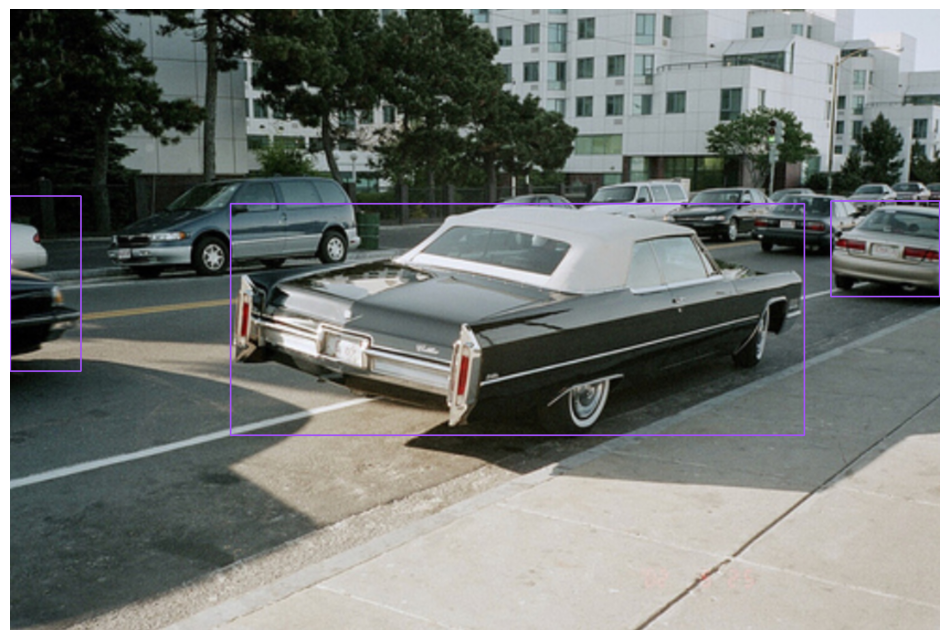

In [36]:
sv.plot_image(draw_boxes_and_labels(image, detections))

Saving the Image with Bounding Boxes

In [ ]:
def save_image(image, original_image_path, output_directory="results"):

    os.makedirs(output_directory, exist_ok=True)
    filename = os.path.basename(original_image_path)
    output_path = os.path.join(output_directory, f"result_{filename}")
    cv2.imwrite(output_path, image)
    return output_path

#### Don't forgot to add your image file(s)!

### Running the whole thing!

In [ ]:
def main():

    ## Authentication info to load the model
    ## Sample project: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/model/25
    ## Workspace ID: "roboflow-universe-projects", Project ID: "construction-site-safety", Version Number: 25
    api_key = "ROBOFLOW_PRIVATE_API_KEY"
    workspace_id = "ROBOFLOW_WORKSPACE_ID"
    project_id = "ROBOFLOW_POJECT_ID"
    version_number = "ROBOFLOW_VERSION_NUMBER"
    project, model = load_roboflow_model(api_key, workspace_id, project_id, version_number)

    # Make a prediction on the specified image file
    image_path = "/content/test_images/construction-2-_mp4-13_jpg.rf.dcfc8cd7a7c9f6109ff18cab2b50f6bc.jpg"
    confidence = 40
    overlap = 30
    image, detections = make_prediction(project, model, image_path, confidence, overlap)


    ## Annotate boxes
    image_with_boxes = draw_boxes_and_labels(image, detections)
    sv.plot_image(image_with_boxes)

    # Save the image with bounding boxes for the detected objects drawn on them
    output_path = save_image(image_with_boxes, image_path)

    print(f"The image has been processed and saved to {output_path}")

if __name__ == "__main__":
    main()
